In [30]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima.model import ARIMA




In [31]:


variables =pd.read_csv('NFLX.csv')
Close =variables ["Close"]
Close

variables


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


In [32]:
variables.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [33]:
variables.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700
1006,2019-12-16,300.850006,305.709991,298.630005,304.209991,304.209991,4658900


In [34]:
variables.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


In [35]:
variables.shape

(1007, 7)

In [36]:
variables.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [37]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [38]:
variables.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1002,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False


In [39]:
variables.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


In [40]:
Close.isnull().sum()

0

C:\Users\Mahathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

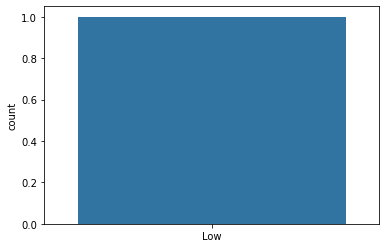

In [41]:
import seaborn as sns
sns.countplot(['Low'])

C:\Users\Mahathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

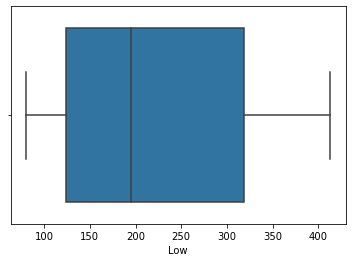

In [42]:
sns.boxplot(variables['Low'])

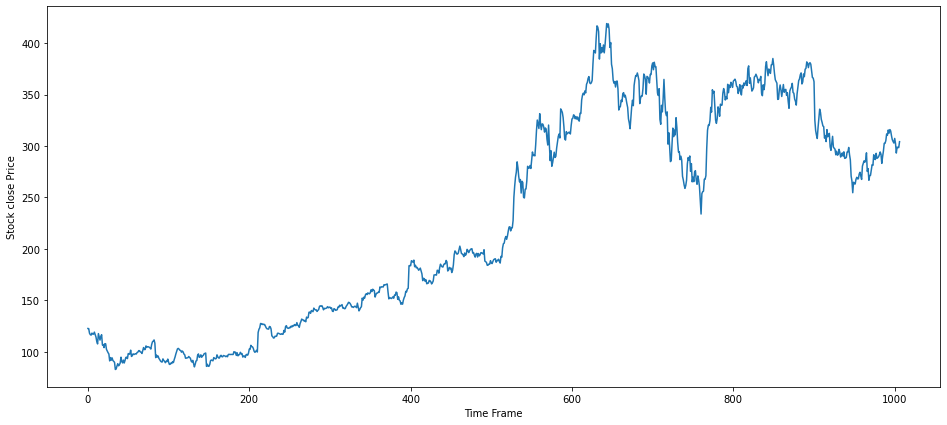

In [43]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock close Price')
ax1.plot(Close)

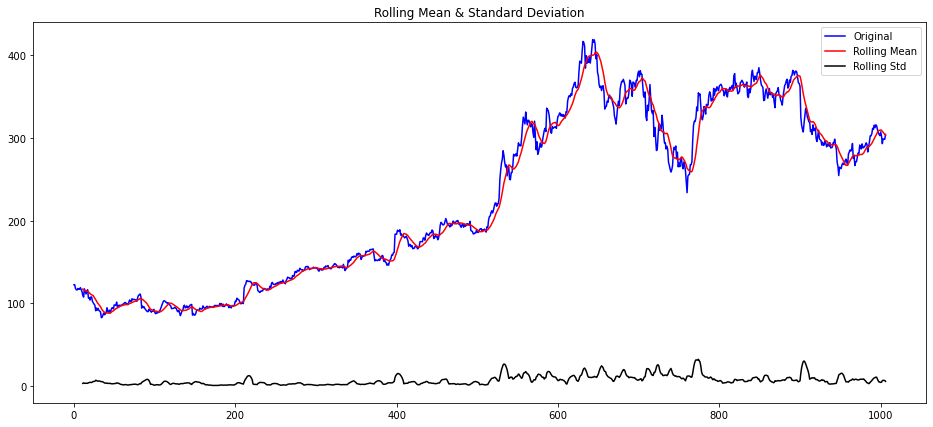

In [44]:
#Determing rolling statistics
rolLmean = Close.rolling(12).mean()
rolLstd = Close.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(Close, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

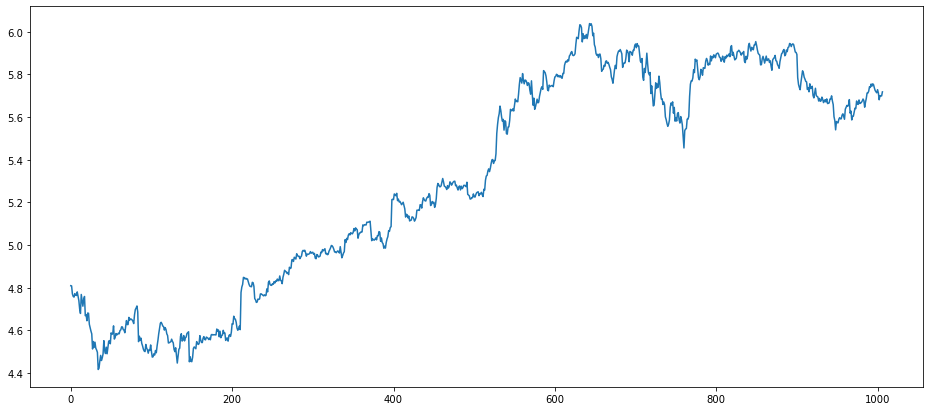

In [45]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

lnClose=np.log(Close)
plt.plot(lnClose)
plt.show()




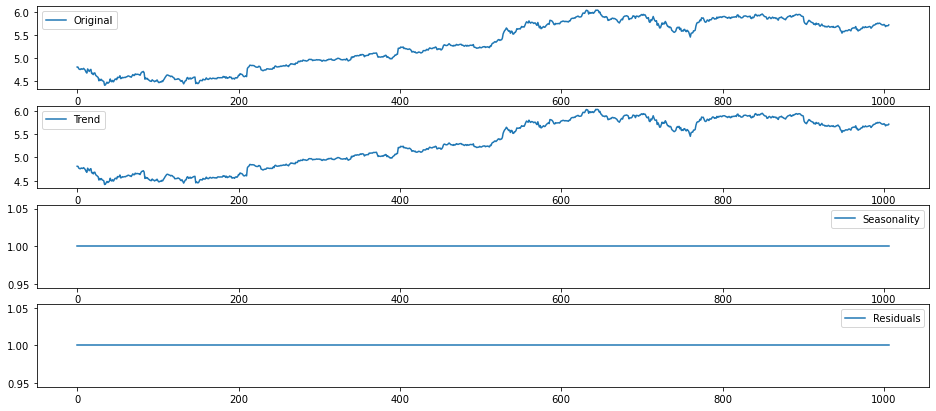

In [46]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(lnClose , model = 'multiplicative' , period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(lnClose, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

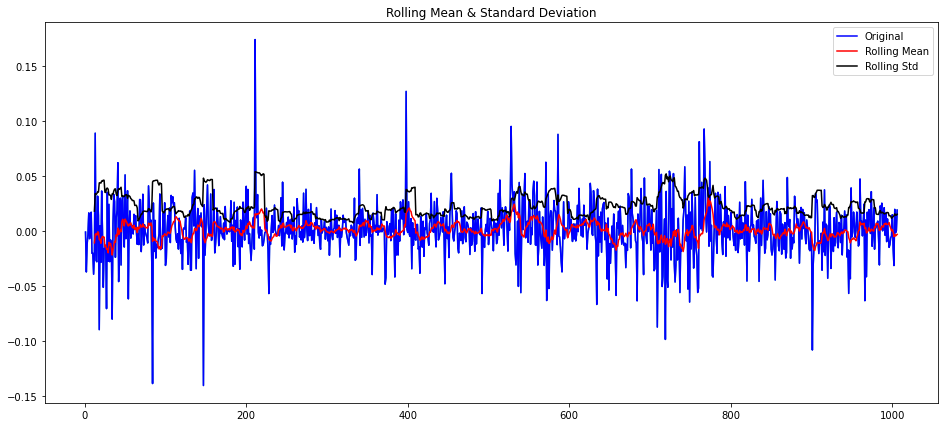

In [47]:
#Lets try differencing (shift time series and substract)
plt.figure(figsize=(16,7))
fig = plt.figure(1)
lnClose_diff = lnClose - lnClose.shift()
plt.plot(lnClose_diff)

#Determing rolling statistics
rolLmean = lnClose_diff.rolling(12).mean()
rolLstd = lnClose_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(lnClose_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [48]:
Close.sort_index(inplace= True)

In [49]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(lnClose_diff, nlags=20)
lag_pacf = pacf(lnClose_diff, nlags=20)

C:\Users\Mahathi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


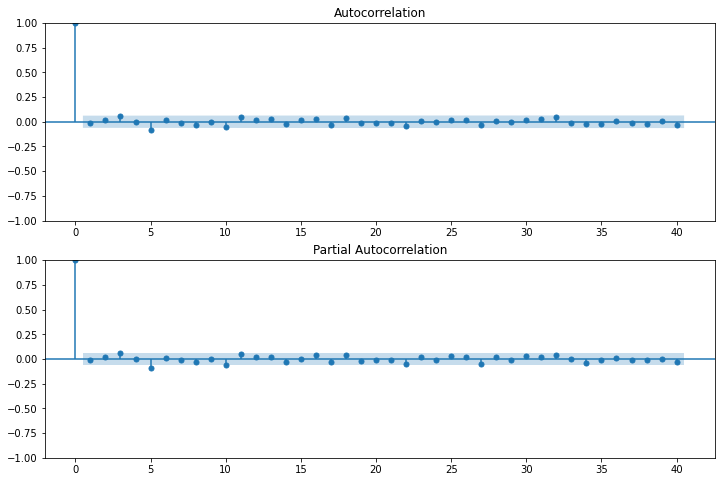

In [50]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(lnClose_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(lnClose_diff.dropna(),lags=40,ax=ax2)

C:\Users\Mahathi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


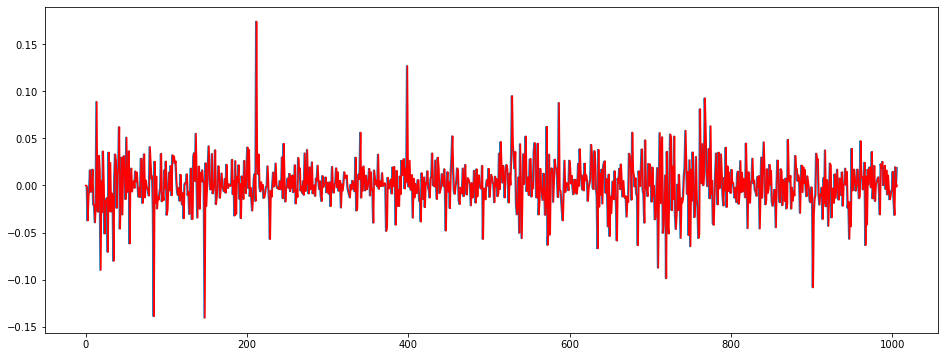

In [51]:
plt.figure(figsize=(16,6))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(lnClose_diff, order=(0,1,0))  
results_ARIMA = model.fit()  
plt.plot(lnClose_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [52]:
predictions=results_ARIMA.predict(122, 127, typ='levels')
print(predictions)
predictionsadjusted=np.exp(predictions)
predictionsadjusted

122   -0.035007
123    0.001066
124    0.002873
125    0.001805
126    0.012123
127   -0.010427
Name: predicted_mean, dtype: float64


122    0.965599
123    1.001067
124    1.002877
125    1.001806
126    1.012196
127    0.989627
Name: predicted_mean, dtype: float64

In [53]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

0    0.000000
1    0.000000
2   -0.001061
3   -0.037339
4   -0.011848
dtype: float64


In [54]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

0    0.000000
1    0.000000
2   -0.001061
3   -0.038399
4   -0.050247
dtype: float64


In [55]:

price_matrix=lnClose.to_numpy()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())






                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1007
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2301.436
Date:                Fri, 26 Aug 2022   AIC                          -4600.873
Time:                        13:49:24   BIC                          -4595.959
Sample:                             0   HQIC                         -4599.006
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0006   1.32e-05     45.686      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              1672.01
Prob(Q):                              0.70   Pr

In [56]:
predictions=model_fit.predict(122, 127, typ='levels')
print(predictions)
predictionsadjusted=np.exp(predictions)
predictionsadjusted

[4.54063166 4.54169774 4.5445706  4.54637515 4.5584978  4.54807056]


array([93.75    , 93.849998, 94.120003, 94.290001, 95.440002, 94.449997])

In [57]:
rms=np.sqrt(np.mean(np.power((predictionsadjusted),2)))
rms

94.31830839676182

In [58]:
# Plot our predictions against the actual values for a visual comparison.
plt.plot(x_test.index[-50:], model_predictions[-50:], color='blue',label='Predicted Price')
plt.plot(x_test.index[-50:], x_test[-50:], color='red', label='Actual Price')
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('ARIMA(4,2,0) Forecast vs Actual')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.figure(figsize=(10,6))
plt.show()

NameError: name 'x_test' is not defined